# Merging OpenSesame logfiles

In [1]:
from matplotlib import pyplot as plt
import os

import numpy as np

from datamatrix import DataMatrix, io, operations as ops

import pandas as pd


Now a text here

In [4]:
df = pd.read_csv('data/subject-0_CI.csv')
print(df)

      ID         acc accept_status    accuracy  age  average_response_time  \
0     14  100.000000           yes  100.000000   23                  17079   
1     34  100.000000           yes  100.000000   23                  13885   
2     12  100.000000           yes  100.000000   23                  11807   
3      5   85.714286           yes   85.714286   23                  10212   
4     31   87.500000           yes   87.500000   23                   9018   
..   ...         ...           ...         ...  ...                    ...   
271    3   97.472924           yes   97.472924   23                    980   
272   45   97.482014           yes   97.482014   23                    979   
273  100   97.491039           yes   97.491039   23                    977   
274  110   97.500000           yes   97.500000   23                    976   
275   29   97.508897           yes   97.508897   23                    974   

     avg_rt background bidi     block  ... time_practice time_s

In [5]:
df


,ID,acc,accept_status,accuracy,age,average_response_time,avg_rt,background,bidi,block,...,time_practice,time_stroop,time_target,title,total_correct,total_response_time,total_responses,uniform_coordinates,width,word
0,14,100.000000,yes,100.000000,23,17079,17079,#ffffff,no,practice,...,123799,123895,124469,Stroop CI,4,68319,4,yes,1366,RED
1,34,100.000000,yes,100.000000,23,13885,13885,#ffffff,no,practice,...,123799,126701,127275,Stroop CI,5,69428,5,yes,1366,LOT
2,12,100.000000,yes,100.000000,23,11807,11807,#ffffff,no,practice,...,123799,129972,130547,Stroop CI,6,70842,6,yes,1366,GREEN
3,5,85.714286,yes,85.714286,23,10212,10212,#ffffff,no,practice,...,123799,133556,134130,Stroop CI,6,71484,7,yes,1366,GREEN
4,31,87.500000,yes,87.500000,23,9018,9018,#ffffff,no,practice,...,123799,136370,136944,Stroop CI,7,72150,8,yes,1366,LOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,3,97.472924,yes,97.472924,23,980,980,#ffffff,no,I,...,123799,917937,918511,Stroop CI,270,271492,277,yes,1366,BLUE
272,45,97.482014,yes,97.482014,23,979,979,#ffffff,no,I,...,123799,920705,921279,Stroop CI,271,272211,278,yes,1366,YELLOW
273,100,97.491039,yes,97.491039,23,977,977,#ffffff,no,I,...,123799,923590,924164,Stroop CI,272,272818,279,yes,1366,BLUE
274,110,97.500000,yes,97.500000,23,976,976,#ffffff,no,I,...,123799,926349,926925,Stroop CI,273,273312,280,yes,1366,KNIFE


In [6]:
from datamatrix import io

dm = io.readtxt('data/subject-0_CI.csv')
print(dm)

+----+----+---------------+---------------+---------------+-----+-----------------------+
| #  | ID |      acc      | accept_status |    accuracy   | age | average_response_time |
+----+----+---------------+---------------+---------------+-----+-----------------------+
| 0  | 14 |      100      |      yes      |      100      |  23 |         17079         |
| 1  | 34 |      100      |      yes      |      100      |  23 |         13885         |
| 2  | 12 |      100      |      yes      |      100      |  23 |         11807         |
| 3  | 5  | 85.7142857143 |      yes      | 85.7142857143 |  23 |         10212         |
| 4  | 31 |      87.5     |      yes      |      87.5     |  23 |          9018         |
| 5  | 25 | 88.8888888889 |      yes      | 88.8888888889 |  23 |          8104         |
| 6  | 24 |       90      |      yes      |       90      |  23 |          7438         |
| 7  | 2  | 90.9090909091 |      yes      | 90.9090909091 |  23 |          6844         |
| 8  | 33 

In [7]:
# Change this to the folder that contains the .csv files
SRC_FOLDER = 'data'
# Change this to a list of column names that you want to keep
COLUMNS_TO_KEEP = [
    'subject_nr',
    'congruency',
    'response_time',
    'acc'
]


dm = DataMatrix()
for basename in os.listdir(SRC_FOLDER):
    path = os.path.join(SRC_FOLDER, basename)
    print('Reading {}'.format(path))
    dm <<= ops.keep_only(io.readtxt(path), *COLUMNS_TO_KEEP)
io.writetxt(dm, 'merged-data.csv')



Reading data\CI_RSI2000_test.csv
Reading data\subject-0_CI.csv
Reading data\subject-11_CI.csv
Reading data\subject-12_IC.csv
Reading data\subject-13_CI.csv
Reading data\subject-14_IC.csv
Reading data\subject-1_IC.csv
Reading data\subject-3_CI.csv
Reading data\subject-4_IC.csv
Reading data\subject-5_CI.csv
Reading data\subject-6.csv
Reading data\subject-7_IC.csv
Reading data\subject-9_IC.csv


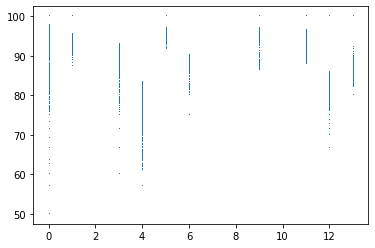

In [8]:
dm = io.readtxt('merged-data.csv')
df = pd.read_csv('merged-data.csv')

plt.plot(dm.subject_nr, dm.acc, ',')



In [10]:
#check counts
pd.pivot_table(
    dm,
    values="acc",
    index=["subject_nr"],
    columns=["congruency"],
    aggfunc=len,
)


congruency,con,inc,neutral
subject_nr,,,
0,480,480,144
1,120,120,36
3,120,120,36
4,120,120,36
5,120,120,36
6,120,120,36
9,120,120,36
11,120,120,36
12,120,120,36


(array([ 3.,  0.,  2.,  7., 10., 10., 21., 17., 18., 21., 19., 31., 37.,
        28., 35., 49., 43., 44., 51., 52., 46., 56., 45., 42., 44., 37.,
        43., 47., 44., 30., 40., 26., 36., 28., 24., 17., 31., 25., 19.,
        21., 21., 18., 19., 21., 15., 15., 11., 10., 13., 12.,  9., 12.,
        11.,  7.,  8., 14.,  7.,  9.,  8.,  5.,  7.,  4.,  6.,  5.,  6.,
         4.,  3.,  4.,  3.,  7.,  4.,  0.,  1.,  2.,  5.,  5.,  5.,  1.,
         1.,  3.,  0.,  1.,  1.,  3.,  1.,  2.,  1.,  1.,  1.,  2.,  0.,
         2.,  0.,  0.,  1.,  2.,  2.,  0.,  1., 19.]),
 array([ 334.  ,  350.66,  367.32,  383.98,  400.64,  417.3 ,  433.96,
         450.62,  467.28,  483.94,  500.6 ,  517.26,  533.92,  550.58,
         567.24,  583.9 ,  600.56,  617.22,  633.88,  650.54,  667.2 ,
         683.86,  700.52,  717.18,  733.84,  750.5 ,  767.16,  783.82,
         800.48,  817.14,  833.8 ,  850.46,  867.12,  883.78,  900.44,
         917.1 ,  933.76,  950.42,  967.08,  983.74, 1000.4 , 1017.06,
        

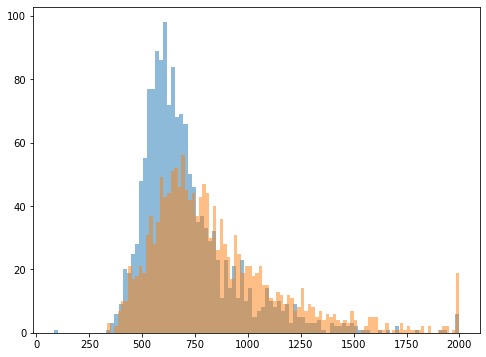

In [11]:
#datamatrix syntax
plt.figure(figsize=(8,6))
plt.hist((dm.congruency == 'con').response_time, bins=100, alpha=0.5, label="data1")
plt.hist((dm.congruency == 'inc').response_time, bins=100, alpha=0.5, label="data2")


(array([ 3.,  0.,  2.,  7., 10., 10., 21., 17., 18., 21., 19., 31., 37.,
        28., 35., 49., 43., 44., 51., 52., 46., 56., 45., 42., 44., 37.,
        43., 47., 44., 30., 40., 26., 36., 28., 24., 17., 31., 25., 19.,
        21., 21., 18., 19., 21., 15., 15., 11., 10., 13., 12.,  9., 12.,
        11.,  7.,  8., 14.,  7.,  9.,  8.,  5.,  7.,  4.,  6.,  5.,  6.,
         4.,  3.,  4.,  3.,  7.,  4.,  0.,  1.,  2.,  5.,  5.,  5.,  1.,
         1.,  3.,  0.,  1.,  1.,  3.,  1.,  2.,  1.,  1.,  1.,  2.,  0.,
         2.,  0.,  0.,  1.,  2.,  2.,  0.,  1., 19.]),
 array([ 334.  ,  350.66,  367.32,  383.98,  400.64,  417.3 ,  433.96,
         450.62,  467.28,  483.94,  500.6 ,  517.26,  533.92,  550.58,
         567.24,  583.9 ,  600.56,  617.22,  633.88,  650.54,  667.2 ,
         683.86,  700.52,  717.18,  733.84,  750.5 ,  767.16,  783.82,
         800.48,  817.14,  833.8 ,  850.46,  867.12,  883.78,  900.44,
         917.1 ,  933.76,  950.42,  967.08,  983.74, 1000.4 , 1017.06,
        

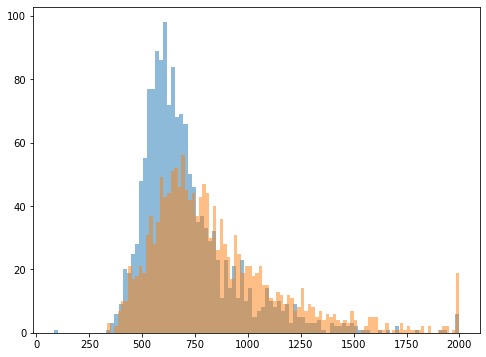

In [12]:
#dataframe syntax
plt.figure(figsize=(8,6))
plt.hist(df.query("congruency == 'con'").response_time, bins=100, alpha=0.5, label="data1")
plt.hist(df.query("congruency == 'inc'").response_time, bins=100, alpha=0.5, label="data2")


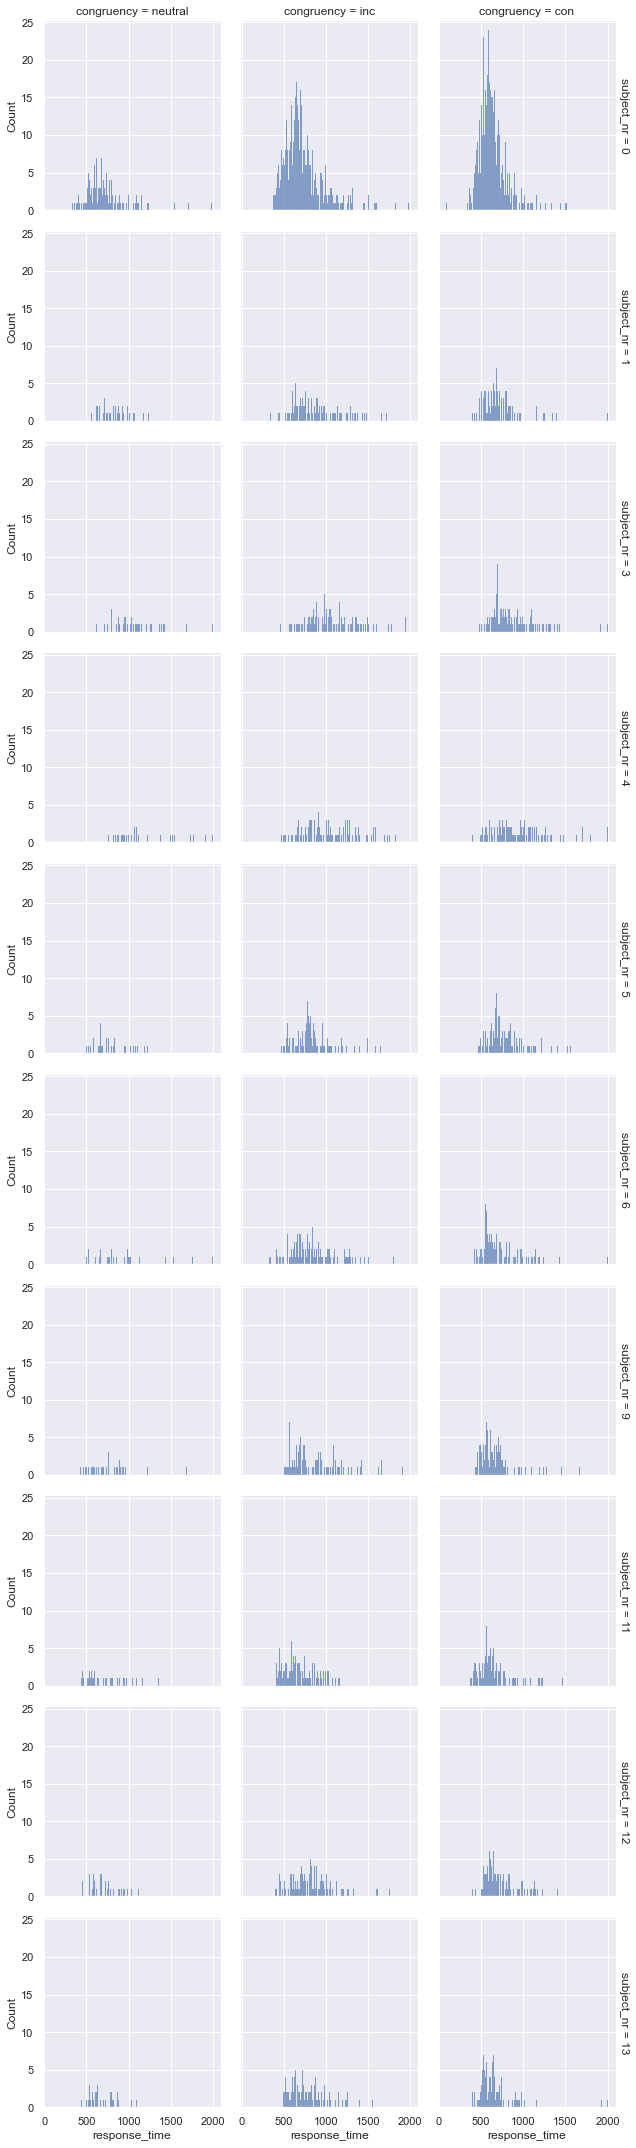

In [14]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.displot(
    df, x="response_time", col="congruency", row="subject_nr",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
)



In [15]:
df

,acc,congruency,response_time,subject_nr
0,75.000000,neutral,1988,0
1,80.000000,neutral,1060,0
2,83.333333,neutral,890,0
3,85.714286,inc,692,0
4,87.500000,neutral,1155,0
...,...,...,...,...
3583,88.447653,con,534,9
3584,88.489209,con,566,9
3585,88.530466,con,688,9
3586,88.571429,neutral,688,9
